In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

import spacy
from tqdm import tqdm


# Imports cleaned tweets data

In [14]:
df_tickers_dow = pd.read_csv("data/tickers_dow.csv")
df_tickers_sp_100 = pd.read_csv("data/tickers_sp_100.csv")

df_tickers = pd.concat([df_tickers_dow, df_tickers_sp_100])

id2ticker = dict(zip(df_tickers.user_id, df_tickers.ticker))

In [15]:
df_tweets = pd.read_csv('data/tweets_dow.csv', parse_dates=['created_at'], dtype={'id':'Int64', 'text':'string', 'author_id':'Int64'})

df_tweets.rename(columns={'created_at':'time'}, inplace=True)
df_tweets['ticker'] = df_tweets['author_id'].map(id2ticker)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186204 entries, 0 to 186203
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   id         186204 non-null  Int64              
 1   author_id  186204 non-null  Int64              
 2   text       186204 non-null  string             
 3   time       186204 non-null  datetime64[ns, UTC]
 4   ticker     186204 non-null  object             
dtypes: Int64(2), datetime64[ns, UTC](1), object(1), string(1)
memory usage: 7.5+ MB


In [16]:
df_tweets.head()

,id,author_id,text,time,ticker
0,1530202298017890306,21021891,"We're excited to announce we have sanctioned the Ballymore project in the deepwater U.S. Gulf of Mexico. This low-cost tieback project is expected to add up to 75,000 barrels per day of oil production to help meet US demand.",2022-05-27 15:00:32+00:00,CVX
1,1530201208312438790,21021891,"Chevron's US Permian Basin operation sites are approximately two-thirds less carbon-intensive than the global average. As part of a larger effort to help offset rising energy demands and lower carbon emissions, we are increasing production in the Permian Basin by over 15%.",2022-05-27 14:56:12+00:00,CVX
2,1529833838020644864,21021891,"We have identified nearly 100 GHG abatement projects to reduce the carbon intensity of our operations, and expect them to deliver approximately 4 million tonnes of emissions reductions per year when completed. Read on in our Corporate Sustainability Report.",2022-05-26 14:36:24+00:00,CVX
3,1529537844171227136,21021891,We’ve identified nearly 100 GHG-abatement projects that are expected to deliver approximately 4M tonnes of emissions reductions per year. Learn more in our Corporate Sustainability Report: https://t.co/dLmfU8ibNC https://t.co/9QzRij2PuP,2022-05-25 19:00:14+00:00,CVX
4,1527752758337540096,21021891,RT @ftlive: Decarbonising an industry in recovery: Mark Nelson tells us what he sees on the horizon for sustainable aviation fuel. Mark wil…,2022-05-20 20:46:56+00:00,CVX


In [17]:
# number of tweets by firm

df_tweets.groupby('ticker').count().id.sort_values()

ticker
HON      1688
BA       1725
CVX      2266
MCD      2671
UNH      2673
NKE      2741
WBA      2876
MMM      3000
HD       4144
WMT      4518
KO       4547
MA       4742
MRK      4872
INTC     4898
DOW      4967
AXP      6052
JNJ      6128
JPM      6390
TRV      6518
CAT      6593
PG       6847
AMGN     8038
IBM      8350
AAPL     9005
CSCO     9406
MSFT     9456
DIS     10151
T       11314
GS      14376
CRM     15252
Name: id, dtype: int64

# Classify tweets from trained model

- Add column `pred_score` to `df_tweets`

In [18]:
nlp = spacy.load("./output/model-best")

In [19]:
data = tuple(zip(df_tweets.text.tolist(), df_tweets.index))

In [20]:
pred_score = np.zeros(len(df_tweets))

for doc, i in tqdm(nlp.pipe(data, as_tuples=True), total=len(df_tweets)):
    pred_score[i] = doc.cats['climate_related']

df_tweets['pred_score'] = pred_score

100%|██████████| 186204/186204 [00:32<00:00, 5793.98it/s]


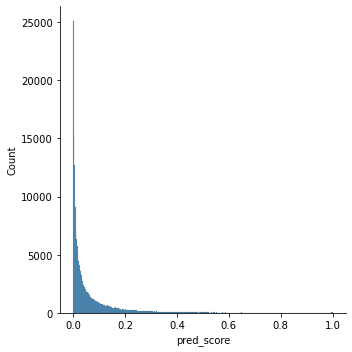

In [21]:
# pred_score pooled from all twitter accounts

sns.displot(df_tweets.pred_score)

In [22]:
# show a snippet of tweets within percentile of pred_score

pd.options.display.max_colwidth = 300

percentile = 0.5

print(len(df_tweets[['pred_score', 'text']][df_tweets.pred_score > percentile]))
df_tweets[['pred_score', 'text']][(df_tweets.pred_score > percentile) & (df_tweets.pred_score < percentile + 0.1)].sample(20).sort_values('pred_score')

4287


,pred_score,text
128651,0.505861,"🌏 Live from New York City, it's #SalesforceTour, TOMORROW! Featuring some of the world's most brilliant business minds discussing #AI, the #FourthIndustrialRevolution, and using business as a #PlaformForChange. Don't miss a single second: https://t.co/uIAry0UhDL https://t.co/GK2GMaRApc"
145215,0.514866,RT @surface: Get inspired to #DoGreatThings as artist #Persue designs a mural on #SurfaceBook for our #DesignedOnSurface series: https://t.…
77722,0.522297,#ITP is #rare blood disorder in which low levels of platelets in the body contribute to bleeding or bruising #RareDiseaseDay
153140,0.527661,RT @OhioChamber: Our member @UnitedHealthGrp has supported the Columbus-based @CelebrateOne initiative to combat infant mortality. Thanks t…
35684,0.532550,"Sustainability is our commitment to building a better world, and no one knows that more than Jeff Wilson, our Global Head of Total Rewards. Listen to Wilson cover all-things sustainability in our new Beyond The Iron podcast. https://t.co/5zhdnqF56b"
66468,0.540041,Smart cities are more efficient and resilient: https://t.co/daSrfTbVmi
22336,0.540623,This week we continue the conversation from #CiscoLive and we hear the latest in #CIO research. Read about this and more in this week in review: https://t.co/p7oP991eor https://t.co/SLBoIOszF9
1694,0.549188,RT @TBrandStudio: We have reduced emissions while growing the economy. https://t.co/5MuI0iYZnn https://t.co/R3kxXqqgKK
23418,0.555769,"Manage hybrid applications with one simple environment deploy, connect, secure, and monitor your Kubernetes-based applications across on-premises and the AWS cloud."
26673,0.559914,"Hanging out with our CTO of Cognitive Collaboration, @tim_tuttle in the green room at #CiscoPS17 #CiscoSpark @CiscoCollab -Rowan https://t.co/CQLdcVBjey"


In [23]:
def esg_score(pred_scores, slope = 60, threshold = 0.5):
    '''
    aggragate score by applying sigmoid, then take mean
    input: np.array of pred_score
    output: scaler
    '''
    return np.mean(1 / (1 + np.exp(-slope * (pred_scores - threshold))), axis=0)

In [24]:
df = df_tweets.pivot(index=['id', 'time'], columns='ticker',values='pred_score')

# after pivot, df contain lots of NaN, which will be excluded after aggregate

df_month = df.groupby(pd.Grouper(freq='M', level='time')).aggregate(esg_score, threshold = 0.52)
df_week = df.groupby(pd.Grouper(freq='W', level='time')).aggregate(esg_score, threshold = 0.52)


In [25]:
df_week.isnull().sum().sort_values(ascending=False).head()

ticker
NKE     90
AAPL    58
KO      56
BA      29
HON     28
dtype: int64

In [26]:
df_week.mean().sort_values().head(10)

ticker
AAPL    0.001341
KO      0.004635
DIS     0.007555
AXP     0.008423
MA      0.009091
T       0.011464
INTC    0.011869
JNJ     0.012607
WBA     0.012627
NKE     0.013734
dtype: float64

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

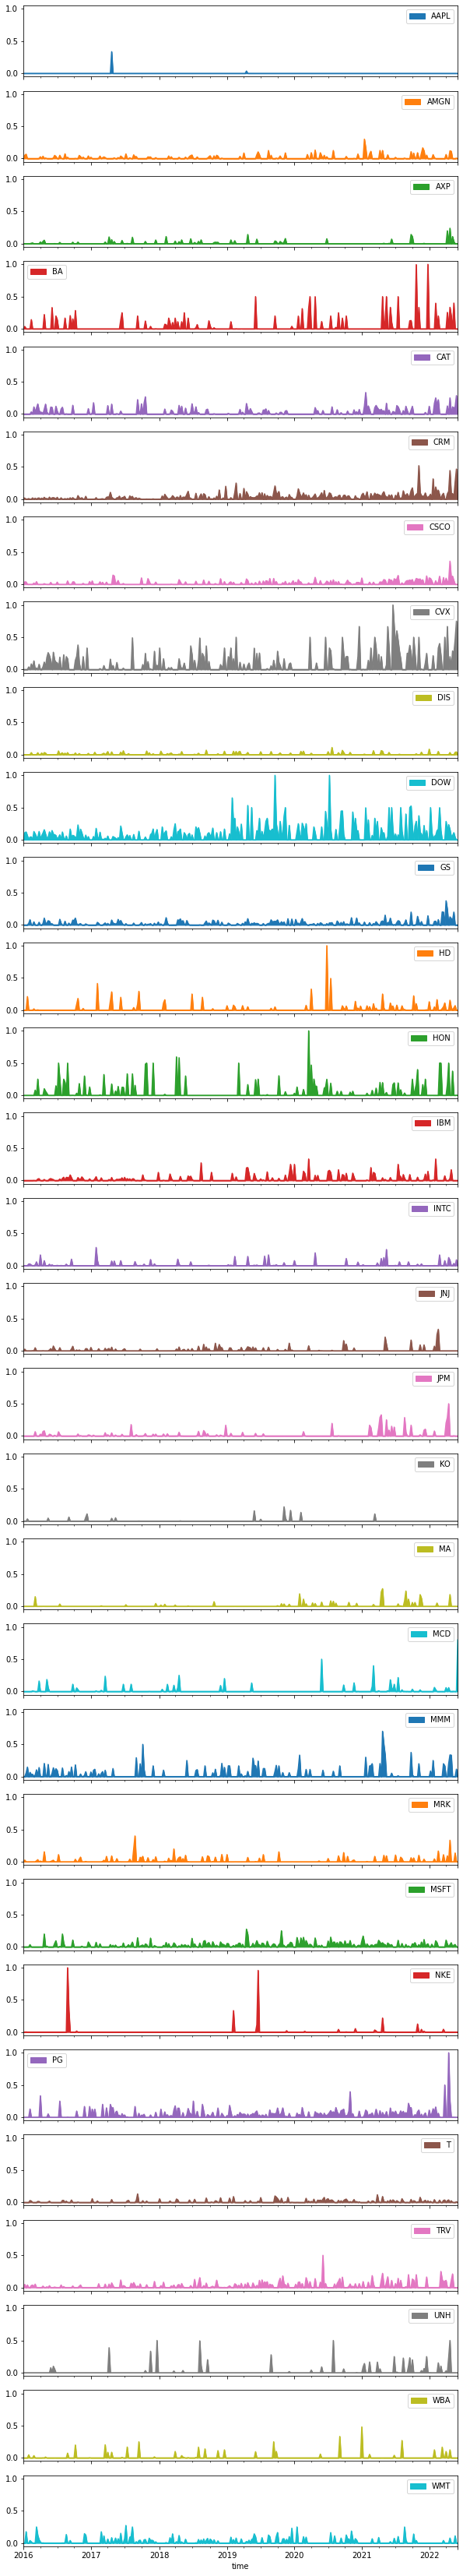

In [30]:
df_week.plot.area(subplots=True, figsize=(10, 60), sharey=True)

In [28]:
df_week.to_csv('climate_score_week.csv')
df_month.to_csv('climate_score_month.csv')